In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
!pip install polyglot -q
!pip install pyicu -q
!pip install Morfessor -q
!pip install pycld2 -q

In [ ]:
%%bash
polyglot download LANG:uk

In [6]:
from polyglot.downloader import downloader
from polyglot.text import cached_property, Text

# Data preprocessing

## Downloading files from Google Drive

In this step, we download to our notebook the batch of previously selected children books from TULA, with which we'll do all the semantic magic further.

In [7]:
from google.colab import drive
drive._mount('/content/drive')

Mounted at /content/drive


In [8]:
book_ids = [950,703,835,992,996,852,839,945,881,970,833,760,842,844,879,530,2686,209,1928,234,2886,700,1228, 1316,1875,2131,1104,1624,689,2687,2116,1980,1827,1452,362,2740,2029,2133,1601,2005,2110,1434,487,1584,2490,1725,1432,2885,232,1647,1293,1650,2567,2107,403,701,702,1258,370,174,2108,2178,2659,1732,1869,2356,1117,1138,1229,2109,1230,1693,1728,1295,1231,2137,2652,2159,2257,1227]
book_list = []

for i in range(len(book_ids)):
    temp_df = pd.read_csv("/content/drive/MyDrive/Intro to DS Project/Books (Children books dataset)/"+str(book_ids[i])+".csv")
    book_list.append(temp_df)

Let's check how our books look like.

In [9]:
for i in range(len(book_list)):
  book_list[i] = book_list[i].loc[3:25, ['page', 'text_tesseract']]

In [10]:
book_list[1]

,page,text_tesseract
3,3,"ДОРОГІ ЮНІ ЧИТАЧІ!__LB__Хто такий ""читач""? Це ..."
4,4,"Отож, УПЛДМ подбали, щоб ви цю книжечку дістал..."
5,5,"І. Над Чорним озером__LB__Було це давно, дуже ..."
6,6,"Гарячого літнього дня стежкою, що вела кудись_..."
7,7,"стовбур, що на обох берегах уже запустив у зем..."
8,8,будь обережний і не барись. Личаки маєш. Візьм...
9,9,Ко З__LB____LB__по той бік болота. Глянув і за...
10,10,Покотився на траву козуб із суницями. Хлоп__LB...
11,11,"Борис швидко очуняв, зсунувся з дядькових__LB_..."
12,12,-- Всі на забороло! Заберіть їжу та вартніше__...


## Removing punctuation

To work with data correctly, we need to remove punctuation, "LB" symbols indicating line breaks and page numbers.

In [11]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [12]:
new_punctuation = '”„—«»'

In [13]:
def remove_punctuation(df):
  for punctuation in string.punctuation:
        df["text_tesseract"] = df["text_tesseract"].str.replace(punctuation,'')
  for punctuation in new_punctuation:
        df["text_tesseract"] = df["text_tesseract"].str.replace(punctuation,'')
  df["text_tesseract"] = df["text_tesseract"].str.replace('LB',' ')
  df["text_tesseract"] = df["text_tesseract"].str.replace('\d',' ')
  return df

In [14]:
for i in range(len(book_list)):
  remove_punctuation(book_list[i])

In [15]:
book_list[1]

,page,text_tesseract
3,3,ДОРОГІ ЮНІ ЧИТАЧІ Хто такий читач Це той хто ч...
4,4,Отож УПЛДМ подбали щоб ви цю книжечку дістали ...
5,5,І Над Чорним озером Було це давно дуже давно б...
6,6,Гарячого літнього дня стежкою що вела кудись ...
7,7,стовбур що на обох берегах уже запустив у земл...
8,8,будь обережний і не барись Личаки маєш Візьми ...
9,9,Ко З по той бік болота Глянув і затремтів Там...
10,10,Покотився на траву козуб із суницями Хлоп яча ...
11,11,Борис швидко очуняв зсунувся з дядькових плече...
12,12,Всі на забороло Заберіть їжу та вартніше добр...


## Converting to lower case

Let's also convert all letters to lower case.

In [16]:
for i in range(len(book_list)):
  book_list[i]["text_tesseract"] = book_list[i]["text_tesseract"].str.lower()

In [17]:
book_list[1]

,page,text_tesseract
3,3,дорогі юні читачі хто такий читач це той хто ч...
4,4,отож уплдм подбали щоб ви цю книжечку дістали ...
5,5,і над чорним озером було це давно дуже давно б...
6,6,гарячого літнього дня стежкою що вела кудись ...
7,7,стовбур що на обох берегах уже запустив у земл...
8,8,будь обережний і не барись личаки маєш візьми ...
9,9,ко з по той бік болота глянув і затремтів там...
10,10,покотився на траву козуб із суницями хлоп яча ...
11,11,борис швидко очуняв зсунувся з дядькових плече...
12,12,всі на забороло заберіть їжу та вартніше добр...


## Deleting stop words and tokenization

One more important step in preprocessing is to delete stop words that will not contribute to our semantic analysis.

After it, we can tokenize our text to convert strings to the lists of "tokens" - individual words.

In [18]:
stopwords_ua = pd.read_csv("/content/drive/MyDrive/Intro to DS Project/stopwords_ua.txt", header=None, names=['stopwords'])
stop_words_ua = list(stopwords_ua.stopwords)

In [19]:
stop_words_ua_set = set(stop_words_ua)

def remove_stopwords(df):
  return [word for word in df if word not in stop_words_ua_set]

In [20]:
for book in book_list:
  book.dropna(subset = ["text_tesseract"], inplace=True)

In [21]:
for book in book_list:
  book["text_tokens"] = book.apply(lambda token: word_tokenize(token['text_tesseract']), axis=1)
  book["tokens_without_sw"] = book["text_tokens"].map(remove_stopwords)
  book["token_count"] = book.apply(lambda tc: len(tc["text_tokens"]), axis = 1)
  book["token_count_without_sw"] = book.apply(lambda tcwsw: len(tcwsw["tokens_without_sw"]), axis = 1)

Let's check how the number of tokens changes after removing stop words.

In [22]:
book_list[1]

,page,text_tesseract,text_tokens,tokens_without_sw,token_count,token_count_without_sw
3,3,дорогі юні читачі хто такий читач це той хто ч...,"[дорогі, юні, читачі, хто, такий, читач, це, т...","[дорогі, юні, читачі, читач, читає, книжки, га...",199,96
4,4,отож уплдм подбали щоб ви цю книжечку дістали ...,"[отож, уплдм, подбали, щоб, ви, цю, книжечку, ...","[уплдм, подбали, книжечку, дістали, подбали, в...",222,98
5,5,і над чорним озером було це давно дуже давно б...,"[і, над, чорним, озером, було, це, давно, дуже...","[чорним, озером, шістсот, пятдесят, голих, гір...",113,66
6,6,гарячого літнього дня стежкою що вела кудись ...,"[гарячого, літнього, дня, стежкою, що, вела, к...","[гарячого, літнього, дня, стежкою, вела, зелен...",236,157
7,7,стовбур що на обох берегах уже запустив у земл...,"[стовбур, що, на, обох, берегах, уже, запустив...","[стовбур, обох, берегах, запустив, землю, корі...",221,145
8,8,будь обережний і не барись личаки маєш візьми ...,"[будь, обережний, і, не, барись, личаки, маєш,...","[обережний, барись, личаки, маєш, візьми, ножа...",236,141
9,9,ко з по той бік болота глянув і затремтів там...,"[ко, з, по, той, бік, болота, глянув, і, затре...","[ко, бік, болота, глянув, затремтів, вешталися...",67,41
10,10,покотився на траву козуб із суницями хлоп яча ...,"[покотився, на, траву, козуб, із, суницями, хл...","[покотився, траву, козуб, суницями, хлоп, яча,...",118,78
11,11,борис швидко очуняв зсунувся з дядькових плече...,"[борис, швидко, очуняв, зсунувся, з, дядькових...","[борис, швидко, очуняв, зсунувся, дядькових, п...",110,69
12,12,всі на забороло заберіть їжу та вартніше добр...,"[всі, на, забороло, заберіть, їжу, та, вартніш...","[забороло, заберіть, їжу, вартніше, добро, вор...",78,49


# Visualization: first look

In this step we'll take the first look into the word cloud of the most frequently used words among all children books, to compare it later with corresponding word clouds for books with positive and negative sentiment.

In [23]:
words_unique = []
for book in book_list:
  for index, row in book.iterrows():
    for word in row['tokens_without_sw']:
      if word not in words_unique:
        words_unique.append(word)

In [24]:
words_not_unique = []
for book in book_list:
  for index, row in book.iterrows():
    for word in row['tokens_without_sw']:
        words_not_unique.append(word)

In [25]:
str1 = " "
str1 = str1.join(words_not_unique)

wordcloud = WordCloud(width = 1000, height = 1000,
                relative_scaling = 1,
                background_color ='white',
                stopwords = stop_words_ua).generate(str1)

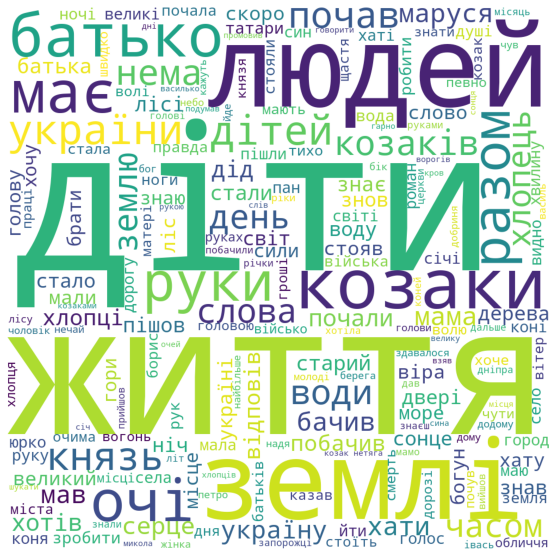

In [ ]:
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
 
plt.show()

As we can see, words "життя", "діти" (the good point for children books!), "людей", "землі" and "козаки" are the most frequent. Let's now head to the sentiment analyses.

# Sentiment analysis

In this step, we'll make sentiment analysis of every page of every book in the dataset and try to get some insides from it, as well as take a look at word clouds of "positive" and "negative" books.

The code chunk in `class Text(Text)` cell was taken from Volodymyr Prypeshniuk's workshop (https://colab.research.google.com/drive/1o-BiiAlzG11mEryYFsejAQq5pUJim7LT#scrollTo=-STcMI9rTWNp).

## Calculating emotions of pages of every book

In [26]:
class Text(Text):
    @cached_property
    def polarity(self):
        scores = [w.polarity for w in self.words if w.polarity != 0]
        if len(scores) == 0:
            return 0.0
        return sum(scores) / float(len(scores))

In [27]:
def emotion(df):
  str1 = " "
  str1 = str1.join(df)
  return Text(str1).polarity

In [28]:
for book in book_list:
  book['emotion'] = 100

In [ ]:
for i in range(1, len(book_list)):
  try:
    book_list[i]['emotion'] = book_list[i]["tokens_without_sw"].map(emotion)
  except ValueError:
    continue

In [30]:
book_list[1]

,page,text_tesseract,text_tokens,tokens_without_sw,token_count,token_count_without_sw,emotion
3,3,дорогі юні читачі хто такий читач це той хто ч...,"[дорогі, юні, читачі, хто, такий, читач, це, т...","[дорогі, юні, читачі, читач, читає, книжки, га...",199,96,-1.000000
4,4,отож уплдм подбали щоб ви цю книжечку дістали ...,"[отож, уплдм, подбали, щоб, ви, цю, книжечку, ...","[уплдм, подбали, книжечку, дістали, подбали, в...",222,98,0.000000
5,5,і над чорним озером було це давно дуже давно б...,"[і, над, чорним, озером, було, це, давно, дуже...","[чорним, озером, шістсот, пятдесят, голих, гір...",113,66,-0.333333
6,6,гарячого літнього дня стежкою що вела кудись ...,"[гарячого, літнього, дня, стежкою, що, вела, к...","[гарячого, літнього, дня, стежкою, вела, зелен...",236,157,0.000000
7,7,стовбур що на обох берегах уже запустив у земл...,"[стовбур, що, на, обох, берегах, уже, запустив...","[стовбур, обох, берегах, запустив, землю, корі...",221,145,0.166667
8,8,будь обережний і не барись личаки маєш візьми ...,"[будь, обережний, і, не, барись, личаки, маєш,...","[обережний, барись, личаки, маєш, візьми, ножа...",236,141,-0.200000
9,9,ко з по той бік болота глянув і затремтів там...,"[ко, з, по, той, бік, болота, глянув, і, затре...","[ко, бік, болота, глянув, затремтів, вешталися...",67,41,-1.000000
10,10,покотився на траву козуб із суницями хлоп яча ...,"[покотився, на, траву, козуб, із, суницями, хл...","[покотився, траву, козуб, суницями, хлоп, яча,...",118,78,0.000000
11,11,борис швидко очуняв зсунувся з дядькових плече...,"[борис, швидко, очуняв, зсунувся, з, дядькових...","[борис, швидко, очуняв, зсунувся, дядькових, п...",110,69,0.600000
12,12,всі на забороло заберіть їжу та вартніше добр...,"[всі, на, забороло, заберіть, їжу, та, вартніш...","[забороло, заберіть, їжу, вартніше, добро, вор...",78,49,-0.333333


"emotion" column corresponds to the general emotion of the page from -1 (negative) to +1 (positive).

## Comparing sentiment of children books

In this step, we'll check the means of the sentiment of every book and compare them through children books dataset to see the distribution of means and proportion of positive/negative books.

In [31]:
emotion_array = []
for book in book_list:
  emotion_array.append(book['emotion'].to_numpy())

In [32]:
emotion_mean = []
for emotion_book in emotion_array:
  emotion_mean.append(np.mean(emotion_book))

In [33]:
emotion_mean_analyse = []
for emotion_book in emotion_mean:
  if emotion_book != 100:
    emotion_mean_analyse.append(emotion_book)

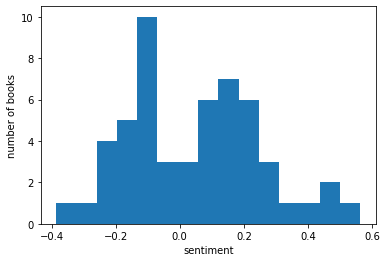

In [36]:
plt.hist(np.array(emotion_mean_analyse), bins=15)
plt.xlabel('sentiment')
plt.ylabel('number of books')
plt.show()

As we can see, most of the books have neutral sentiment (+- 0.2). Let's compare the proportions of positive/negative books and make some statistical analysis to confirm our observations.

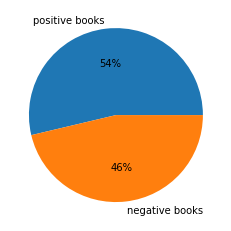

In [39]:
positive_books = 0
negative_books = 0

for emotion_book in emotion_mean_analyse:
  if emotion_book >= 0: positive_books += 1
  else: negative_books += 1

labels = ["positive books", "negative books"]

plt.pie(np.array([positive_books/len(emotion_mean_analyse), negative_books/len(emotion_mean_analyse)]), labels = labels, autopct = '%1.0f%%')
plt.show() 

The proportion of positive and negative books is almost the same with a slight predominance of positive books.

In [40]:
df_emotion_mean_analyse = pd.DataFrame(emotion_mean_analyse, columns = ['emotions in books'])
df_emotion_mean_analyse.describe()

,emotions in books
count,54.000000
mean,0.045883
std,0.211955
min,-0.386128
25%,-0.115104
50%,0.040771
75%,0.185864
max,0.563942


Statistical analysis has proved that most of the books have neutral sentiment (+- 0.2). The mean is close to 0 and standard deviation is close to 0.2.

## WordClouds for positive and negative books

In this step, we'll compare the general word cloud with corresponding word clouds for books with positive and negative sentiment.

In [41]:
positive_books_indices = []
negative_books_indices = []

for i in range(len(emotion_mean)):
  if emotion_mean[i] >= 0 and emotion_mean[i] != 100: positive_books_indices.append(i)
  if emotion_mean[i] < 0: negative_books_indices.append(i)

In [42]:
positive_books_list = []
negative_books_list = []

for i in positive_books_indices:
  positive_books_list.append(book_list[i])

for i in negative_books_indices:
  negative_books_list.append(book_list[i])

### Word cloud for positive books

In [ ]:
words_positive_books = []
for book in positive_books_list:
  for index, row in book.iterrows():
    for word in row['tokens_without_sw']:
        words_positive_books.append(word)

In [ ]:
str2 = " "
str2 = str2.join(words_positive_books)

wordcloud2 = WordCloud(width = 1000, height = 1000,
                relative_scaling = 1,
                background_color ='white',
                stopwords = stop_words_ua).generate(str2)

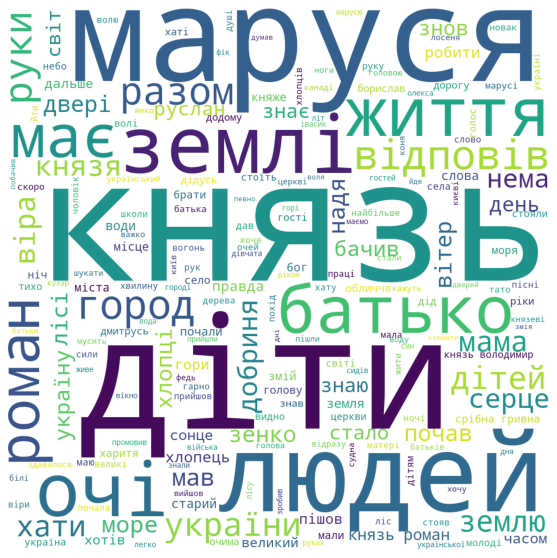

In [ ]:
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wordcloud2)
plt.axis("off")
 
plt.show()

In this word cloud we can again see the word "діти", which refers to the children books, and also can notice such significant words as "князь" and "землі".

### Word cloud for negative books

In [ ]:
words_negative_books = []
for book in negative_books_list:
  for index, row in book.iterrows():
    for word in row['tokens_without_sw']:
        words_negative_books.append(word)

In [ ]:
str3 = " "
str3 = str3.join(words_negative_books)

wordcloud3 = WordCloud(width = 1000, height = 1000,
                relative_scaling = 1,
                background_color ='white',
                stopwords = stop_words_ua).generate(str3)

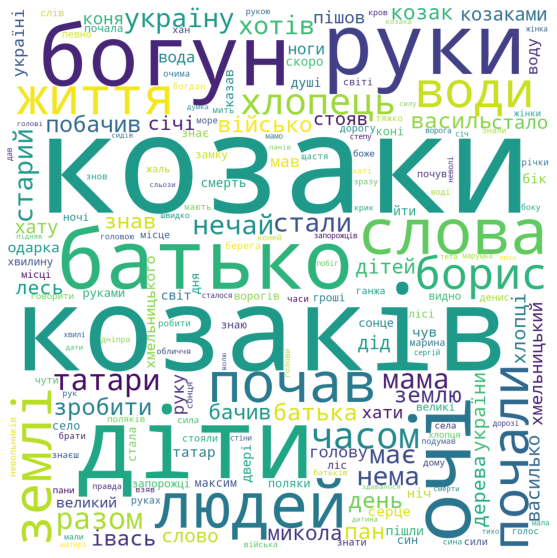

In [ ]:
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wordcloud3)
plt.axis("off")
 
plt.show()

In this word cloud we can again see the word "діти", which refers to the children books, and also can notice such significant words as "козаки" (in two forms)  and "богун".

We can assume that books, which refer to the Cossack times, have mostly negative sentiment, while books, which have references to Kyivan Rus' times, have a positive sentiment. Let's verify this assumption with the help of clusters, generated and kindly provided by my team member Kateryna Burovova.

## Clusters' sentiment analysis

### Patriotic (historic and political) education

Firstly we'll analyze the general "Patriotic (historic and political education)" cluster, which consists of 15 books. We'll analyze only those books, for which sentiment analysis is available.

In [43]:
patriotic_ids = [839, 833, 760, 842, 844, 530, 1228, 487, 1725, 2659, 2356, 1229, 1230, 1231, 1227]
patriotic_list = []

for id in patriotic_ids:
  patriotic_list.append(book_list[book_ids.index(id)])

In [46]:
emotion_array_patriotic = []
for book in patriotic_list:
  emotion_array_patriotic.append(book['emotion'].to_numpy())

In [47]:
emotion_mean_patriotic = []
for emotion_book in emotion_array_patriotic:
  emotion_mean_patriotic.append(np.mean(emotion_book))

In [48]:
emotion_mean_analyse_patriotic = []
for emotion_book in emotion_mean_patriotic:
  if emotion_book != 100:
    emotion_mean_analyse_patriotic.append(emotion_book)

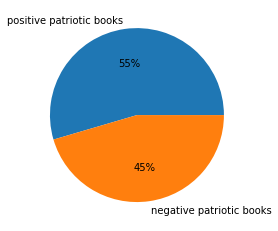

In [53]:
positive_books_patriotic = 0
negative_books_patriotic = 0

for emotion_book in emotion_mean_analyse_patriotic:
  if emotion_book >= 0: positive_books_patriotic += 1
  else: negative_books_patriotic += 1

labels = ["positive patriotic books", "negative patriotic books"]

plt.pie(np.array([positive_books_patriotic/len(emotion_mean_analyse_patriotic), negative_books_patriotic/len(emotion_mean_analyse_patriotic)]), labels = labels, autopct = '%1.0f%%')
plt.show()

In [52]:
df_emotion_mean_analyse = pd.DataFrame(emotion_mean_analyse_patriotic, columns = ['emotions in books'])
df_emotion_mean_analyse.describe()

,emotions in books
count,11.000000
mean,0.104062
std,0.260799
min,-0.179365
25%,-0.099353
50%,0.119928
75%,0.243088
max,0.563942


In [54]:
words_patriotic_books = []
for book in patriotic_list:
  for index, row in book.iterrows():
    for word in row['tokens_without_sw']:
        words_patriotic_books.append(word)

In [55]:
str4 = " "
str4 = str4.join(words_patriotic_books)

wordcloud4 = WordCloud(width = 1000, height = 1000,
                relative_scaling = 1,
                background_color ='white',
                stopwords = stop_words_ua).generate(str4)

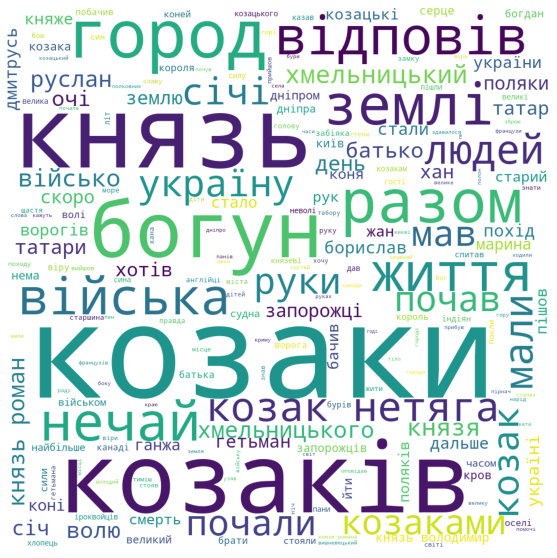

In [56]:
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wordcloud4)
plt.axis("off")
 
plt.show()

We can see that for the general "Patriotic (historic and political education)" cluster we have almost the same results as for the whole children books dataset (but the average sentiment value is slightly higher than 0). From the word cloud we can conclude that our cluster really refers to patriotic education.

### Cossack times

This cluster consists of 8 books. Again we'll analyze only those books, for which sentiment analysis is available.

In [68]:
cossack_ids = [844, 530, 487, 835, 839, 833, 842, 2659]
cossack_list = []

for id in cossack_ids:
  cossack_list.append(book_list[book_ids.index(id)])

In [69]:
emotion_array_cossack = []
for book in cossack_list:
  emotion_array_cossack.append(book['emotion'].to_numpy())

In [70]:
emotion_mean_cossack = []
for emotion_book in emotion_array_cossack:
  emotion_mean_cossack.append(np.mean(emotion_book))

In [71]:
emotion_mean_analyse_cossack = []
for emotion_book in emotion_mean_cossack:
  if emotion_book != 100:
    emotion_mean_analyse_cossack.append(emotion_book)

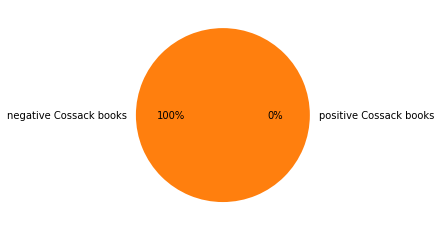

In [72]:
positive_books_cossack = 0
negative_books_cossack = 0

for emotion_book in emotion_mean_analyse_cossack:
  if emotion_book >= 0: positive_books_cossack += 1
  else: negative_books_cossack += 1

labels = ["positive Cossack books", "negative Cossack books"]

plt.pie(np.array([positive_books_cossack/len(emotion_mean_analyse_cossack), negative_books_cossack/len(emotion_mean_analyse_cossack)]), labels = labels, autopct = '%1.0f%%')
plt.show()

In [73]:
df_emotion_mean_analyse = pd.DataFrame(emotion_mean_analyse_cossack, columns = ['emotions in books'])
df_emotion_mean_analyse.describe()

,emotions in books
count,5.000000
mean,-0.106107
std,0.038472
min,-0.172135
25%,-0.106070
50%,-0.092636
75%,-0.080193
max,-0.079503


In [74]:
words_cossack_books = []
for book in cossack_list:
  for index, row in book.iterrows():
    for word in row['tokens_without_sw']:
        words_cossack_books.append(word)

In [75]:
str5 = " "
str5 = str5.join(words_cossack_books)

wordcloud5 = WordCloud(width = 1000, height = 1000,
                relative_scaling = 1,
                background_color ='white',
                stopwords = stop_words_ua).generate(str5)

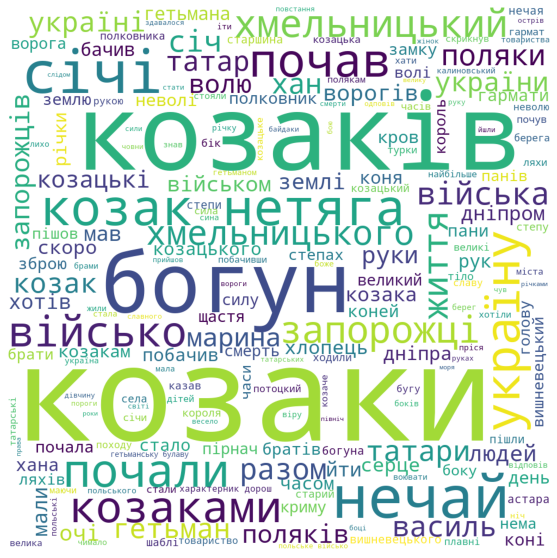

In [76]:
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wordcloud5)
plt.axis("off")
 
plt.show()

We can see that, as we assumed, books about Cossack times have mostly negative sentiments. It is probably related to using words with military semantic, such as "війна", "битва" etc.

### Kyivan Rus' times

This cluster consists of 5 books. Again we'll analyze only those books, for which sentiment analysis is available.

In [77]:
kyivrus_ids = [1228, 1230, 1231, 1229, 1227]
kyivrus_list = []

for id in kyivrus_ids:
  kyivrus_list.append(book_list[book_ids.index(id)])

In [78]:
emotion_array_kyivrus = []
for book in kyivrus_list:
  emotion_array_kyivrus.append(book['emotion'].to_numpy())

In [79]:
emotion_mean_kyivrus = []
for emotion_book in emotion_array_kyivrus:
  emotion_mean_kyivrus.append(np.mean(emotion_book))

In [80]:
emotion_mean_analyse_kyivrus = []
for emotion_book in emotion_mean_kyivrus:
  if emotion_book != 100:
    emotion_mean_analyse_kyivrus.append(emotion_book)

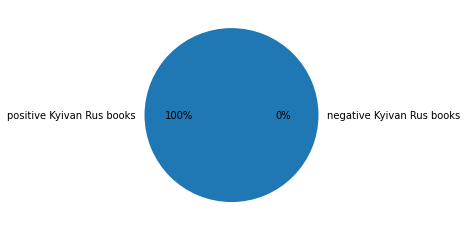

In [82]:
positive_books_kyivrus = 0
negative_books_kyivrus = 0

for emotion_book in emotion_mean_analyse_kyivrus:
  if emotion_book >= 0: positive_books_kyivrus += 1
  else: negative_books_kyivrus += 1

labels = ["positive Kyivan Rus books", "negative Kyivan Rus books"]

plt.pie(np.array([positive_books_kyivrus/len(emotion_mean_analyse_kyivrus), negative_books_kyivrus/len(emotion_mean_analyse_kyivrus)]), labels = labels, autopct = '%1.0f%%')
plt.show()

In [83]:
df_emotion_mean_analyse = pd.DataFrame(emotion_mean_analyse_kyivrus, columns = ['emotions in books'])
df_emotion_mean_analyse.describe()

,emotions in books
count,5.000000
mean,0.329951
std,0.194584
min,0.119928
25%,0.156277
50%,0.329898
75%,0.479710
max,0.563942


In [84]:
words_kyivrus_books = []
for book in kyivrus_list:
  for index, row in book.iterrows():
    for word in row['tokens_without_sw']:
        words_kyivrus_books.append(word)

In [85]:
str6 = " "
str6 = str6.join(words_kyivrus_books)

wordcloud6 = WordCloud(width = 1000, height = 1000,
                relative_scaling = 1,
                background_color ='white',
                stopwords = stop_words_ua).generate(str6)

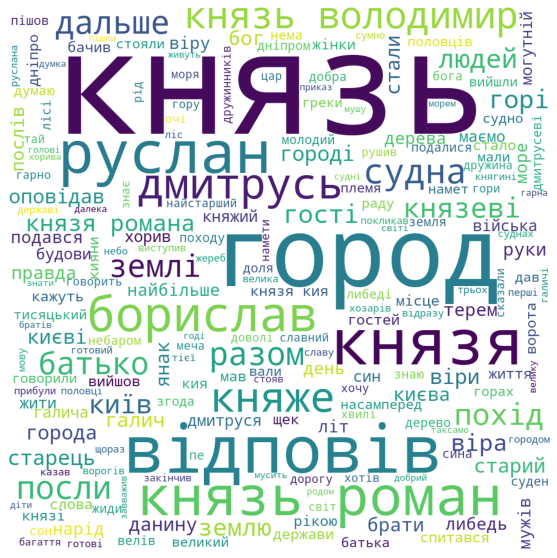

In [86]:
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wordcloud6)
plt.axis("off")
 
plt.show()

We can see that, as we assumed, books about Kyivan Rus' times have mostly positive sentiments.

# Conclusions

Despite the fact, that we have a pretty small and specific dataset of books for analysis (and even smaller dataset of books, for which sentiment analysis is available due to word recognition/the presence of a large number of representative words etc), we got the chance to have a little look into emotions of children books and even get an idea of changing of sentiment with changing of historical epochs of the books' stories.

This allows us to assume that further analysis of discovered differences and application of sentiment analysis to more clusters (and, not less importantly, more books) can reveal much more interesting details and dependencies of epochs, themes, books types, and their corresponding sentiment.

Moreover, it is definitely worth analyzing the sentiment through every book per every page, but for children books it may turn out to be not so representative due to a little number of pages.